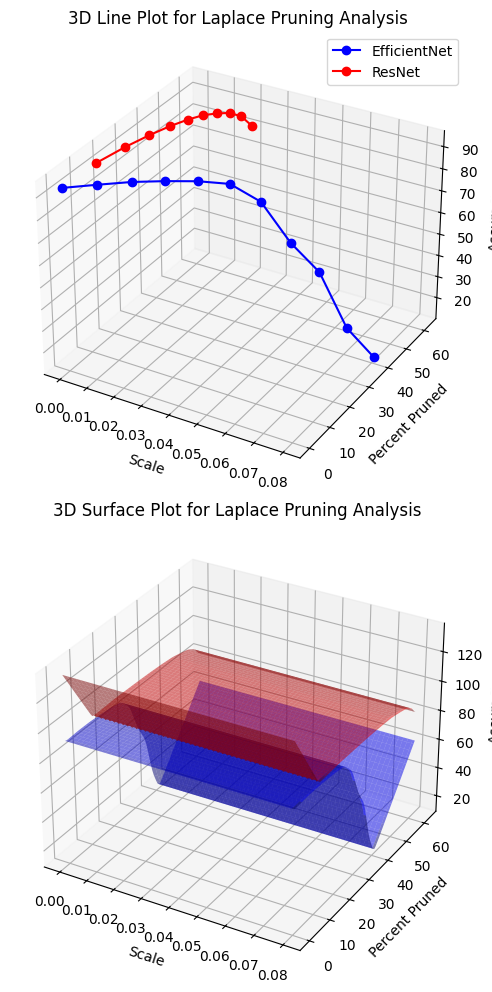

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata, Rbf

scale_efficientnet = [0, 0.008, 0.016, 0.024, 0.032, 0.040, 0.048, 0.056, 0.064, 0.072, 0.080]
percent_pruned_efficientnet = [0, 5.42, 10.67, 15.61, 20.24, 24.51, 28.43, 32.01, 35.31, 38.35, 41.12]
accuracy_efficientnet = [93.01, 92.97, 92.90, 92.23, 91.38, 89.68, 81.53, 63.17, 50.05, 24.65, 11.62]
scale_resnet = [0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.014, 0.016, 0.018, 0.020]
percent_pruned_resnet = [11.90, 22.31, 30.94, 38.03, 43.87, 48.75, 52.87, 56.38, 59.42, 62.06]
accuracy_resnet = [95.39, 95.37, 95.02, 94.58, 93.95, 93.12, 91.58, 89.95, 86.80, 81.18]

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211, projection='3d')

ax1.plot(scale_efficientnet, percent_pruned_efficientnet, accuracy_efficientnet, 'b-o', label='EfficientNet')
ax1.plot(scale_resnet, percent_pruned_resnet, accuracy_resnet, 'r-o', label='ResNet')

ax1.set_xlabel('Scale')
ax1.set_ylabel('Percent Pruned')
ax1.set_zlabel('Accuracy')
ax1.set_title('3D Line Plot for Laplace Pruning Analysis')
ax1.legend()

rbf_efficientnet = Rbf(scale_efficientnet, percent_pruned_efficientnet, accuracy_efficientnet, function='multiquadric')
rbf_resnet = Rbf(scale_resnet, percent_pruned_resnet, accuracy_resnet, function='multiquadric')


scale_fine = np.linspace(0, 0.080, 100)
percent_pruned_fine = np.linspace(0, 62.06, 100)
scale_grid, percent_pruned_grid = np.meshgrid(scale_fine, percent_pruned_fine)

z_efficientnet = rbf_efficientnet(scale_grid, percent_pruned_grid)
z_resnet = rbf_resnet(scale_grid, percent_pruned_grid)

ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_surface(scale_grid, percent_pruned_grid, z_efficientnet, color='blue', alpha=0.5, label='EfficientNet Surface')
ax2.plot_surface(scale_grid, percent_pruned_grid, z_resnet, color='red', alpha=0.5, label='ResNet Surface')

ax2.set_xlabel('Scale')
ax2.set_ylabel('Percent Pruned')
ax2.set_zlabel('Accuracy')
ax2.set_title('3D Surface Plot for Laplace Pruning Analysis')

plt.tight_layout()
plt.show()


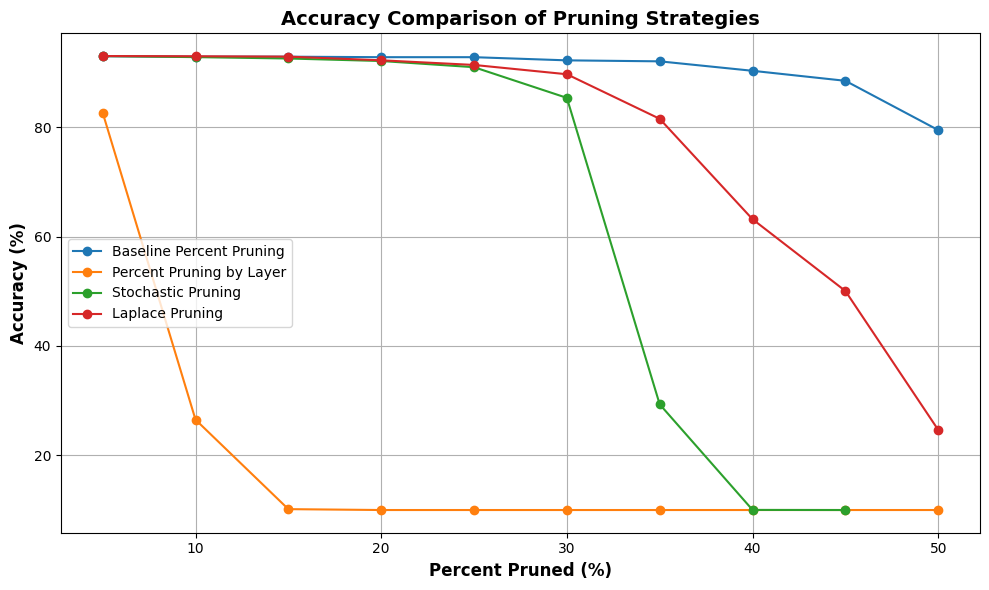

In [2]:
percent_pruned = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
baseline_accuracy = [92.98, 92.89, 92.89, 92.80, 92.80, 92.22, 92.04, 90.31, 88.48, 79.47]
percent_by_layer_accuracy = [82.65, 26.52, 10.16, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00]
stochastic_accuracy = [93.0, 92.81, 92.56, 92.1, 90.97, 85.36, 29.32, 10.02, 10.0, None]  # None where data is missing
laplace_accuracy = [93.01, 92.97, 92.90, 92.23, 91.38, 89.68, 81.53, 63.17, 50.05, 24.65]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(percent_pruned, baseline_accuracy, label='Baseline Percent Pruning', marker='o', linestyle='-')
ax.plot(percent_pruned, percent_by_layer_accuracy, label='Percent Pruning by Layer', marker='o', linestyle='-')
ax.plot(percent_pruned, stochastic_accuracy, label='Stochastic Pruning', marker='o', linestyle='-')
ax.plot(percent_pruned, laplace_accuracy, label='Laplace Pruning', marker='o', linestyle='-')

ax.set_xlabel('Percent Pruned (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Accuracy Comparison of Pruning Strategies', fontsize=14, fontweight='bold')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

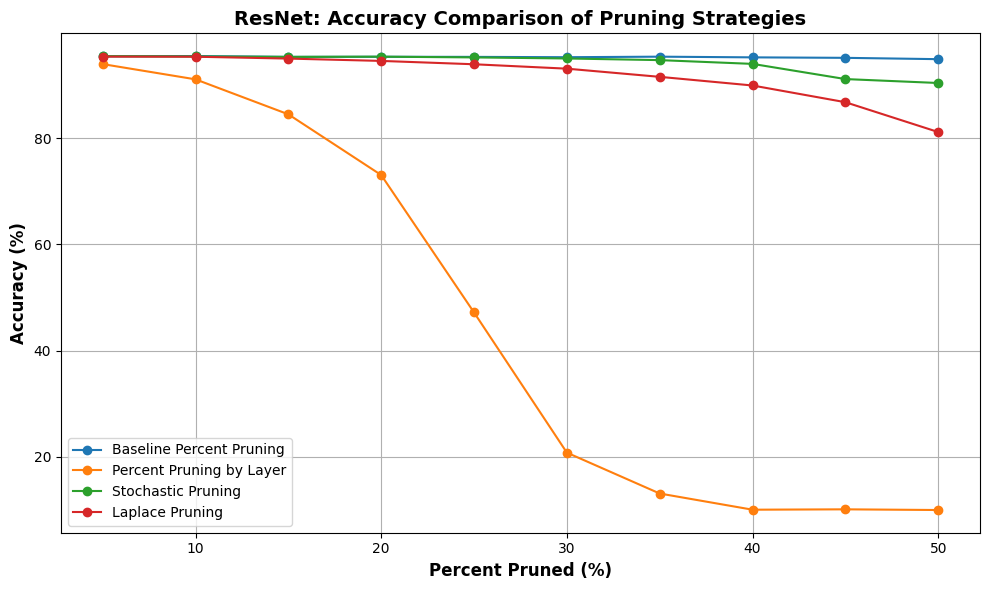

In [3]:
import matplotlib.pyplot as plt

percent_pruned_resnet = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
baseline_accuracy_resnet = [95.45, 95.50, 95.34, 95.36, 95.34, 95.28, 95.38, 95.25, 95.16, 94.91]
percent_by_layer_accuracy_resnet = [93.98, 91.11, 84.52, 73.08, 47.19, 20.78, 13.08, 10.03, 10.10, 9.97]
stochastic_accuracy_resnet = [95.48, 95.42, 95.34, 95.38, 95.24, 95.04, 94.73, 94.02, 91.16, 90.42]
laplace_accuracy_resnet = [95.39, 95.37, 95.02, 94.58, 93.95, 93.12, 91.58, 89.95, 86.80, 81.18]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(percent_pruned_resnet, baseline_accuracy_resnet, label='Baseline Percent Pruning', marker='o', linestyle='-')
ax.plot(percent_pruned_resnet, percent_by_layer_accuracy_resnet, label='Percent Pruning by Layer', marker='o', linestyle='-')
ax.plot(percent_pruned_resnet, stochastic_accuracy_resnet, label='Stochastic Pruning', marker='o', linestyle='-')
ax.plot(percent_pruned_resnet, laplace_accuracy_resnet, label='Laplace Pruning', marker='o', linestyle='-')

ax.set_xlabel('Percent Pruned (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('ResNet: Accuracy Comparison of Pruning Strategies', fontsize=14, fontweight='bold')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
